# KAN: Kolmogorov–Arnold Networks


In [ ]:
from tfkan import DenseKAN

### Abstract
Le Kolmogorov Arnold Networks (KANs) sono un'alternativa alle reti multi-layer perceptron (MLP). Mentre le MLP hanno le funzioni di attivazione fissate sui nodi e utilizzano pesi lineari, le KAN hanno le funzioni di attivazione sugli archi e non sui nodi, utilizzando parametri definiti come funzioni univariate, spesso B-splines.

Una spline è una funzione composta da segmenti polinomiali definiti su intervalli diversi, che si uniscono in modo liscio. Ciò significa che i polinomi che formano la spline si connettono in punti specifici chiamati nodi, garantendo continuità e derivate continue fino a un certo ordine.

Le B-splines sono un tipo di spline definite da funzioni base polinomiali che offrono controllo locale e flessibilità. Possono avere nodi uniformi o non uniformi e possono rappresentare curve razionali tramite NURBS.

Le B-splines possono essere:

- Uniformi: nodi equidistanti.
- Non uniformi: nodi con distanze variabili.
- NURBS (Non-Uniform Rational B-Splines): generalizzazione delle B-splines che includono pesi associati ai punti di controllo, permettendo la rappresentazione di curve e superfici razionali.

Mentre le MLP sono ispirate al Teorema dell'Approssimazione Universale, le KAN sono ispirate al Teorema di Kolmogorov-Arnold, il quale afferma che qualsiasi funzione continua multivariata può essere rappresentata come somma di funzioni di una sola variabile e un numero finito di funzioni.

Le KAN di dimensioni minori possono raggiungere o superare l'accuratezza delle MLP.

Le KAN crescono in complessità e capacità di apprendimento più efficientemente rispetto alle MLP quando le dimensioni del modello aumentano, scalando meglio.

Le KAN possono essere visualizzate in modo intuitivo, poiché le funzioni di attivazione sugli archi sono facilmente interpretabili e analizzabili. Questo aspetto le rende più interpretabili e spiegabili, anche se a parità di parametri sono più costose da addestrare e memorizzare rispetto alle MLP. Tuttavia, le KAN più piccole possono essere più accurate e efficienti nei parametri.

Così come una MLP è composta da livelli densi sovrapposti, una rete KAN è formata da multipli strati KAN sovrapposti.

In base al tipo di spline utilizzata e con un piccolo cambiamento nei parametri, la rete KAN può "esplodere", cioè cambiare significativamente il suo output.

Confronto tra MLP e KAN:
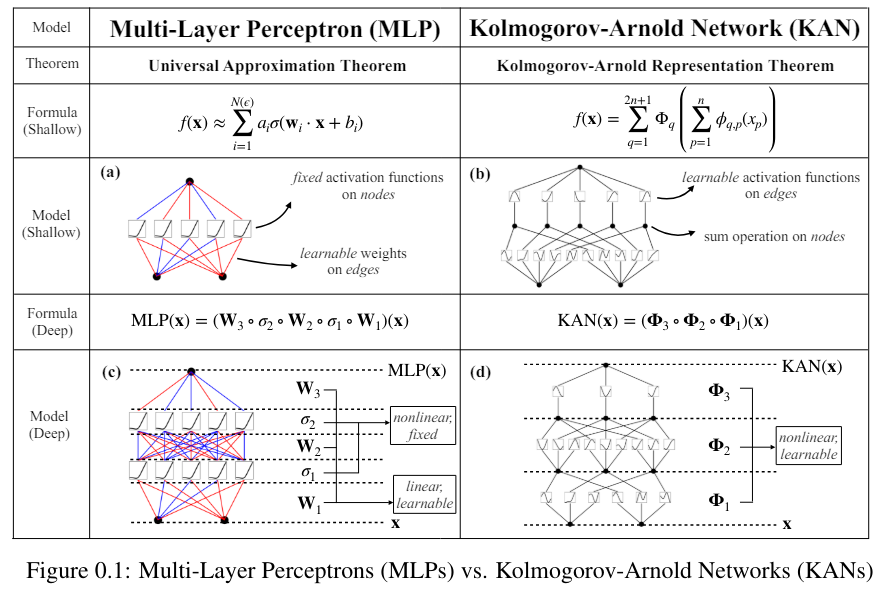

# 1 Introduction
Le KAN, come le MLP, hanno una struttura densamente connessa in cui i nodi semplicemente sommano gli ingressi senza applicare alcuna funzione di attivazione o non linearità. La linearità viene invece applicata sugli archi.

I loro parametri sono una matrice di funzioni 1D parametrizzate.

Le spline sono accurate per funzioni a bassa dimensione (con poche variabili), facili da regolare localmente (la capacità di modificare la forma della spline in una parte specifica del dominio senza influenzare altre parti) e capaci di passare tra diverse risoluzioni (si riferisce alla capacità di rappresentare i dati a diversi livelli di dettaglio).

Tuttavia, le spline hanno un serio problema di maledizione della dimensionalità (non scalano bene) a causa della loro incapacità di sfruttare strutture compositive (modo in cui i dati sono strutturati e organizzati).

D'altra parte, le reti neurali multilivello (MLP) soffrono meno della COD grazie al loro apprendimento delle caratteristiche, ma sono meno accurate delle spline in basse dimensioni a causa della loro incapacità di ottimizzare funzioni univariate.

Per apprendere una funzione in modo accurato, un modello dovrebbe non solo apprendere la struttura compositiva (gradi di libertà esterni), ma anche approssimare bene le funzioni univariate (gradi di libertà interni).

Le KAN hanno MLP all'esterno e spline all'interno. Di conseguenza, le KAN non solo possono apprendere caratteristiche (grazie alla loro somiglianza esterna con le MLP), ma possono anche ottimizzare queste caratteristiche apprese con grande accuratezza (grazie alla loro somiglianza interna con le spline).

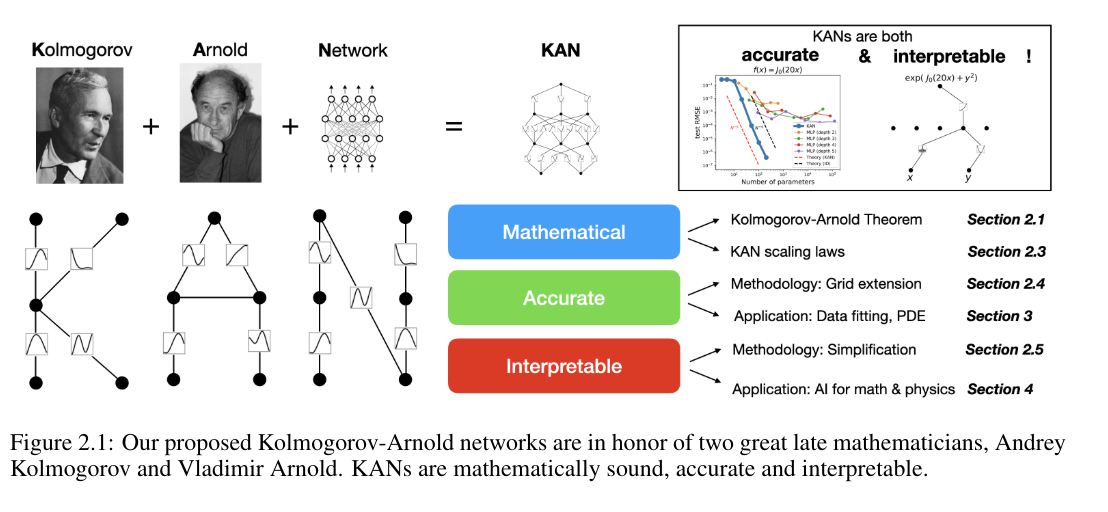



# 2 Kolmogorov–Arnold Networks (KAN)

## 2.1 Kolmogorov-Arnold Representation theorem
Vladimir Arnold e Andrey Kolmogorov stabilirono che se f è una funzione continua multivariata su un dominio limitato, allora f può essere rappresentata come una composizione finita di funzioni continue di una singola variabile e l'operazione binaria di addizione.

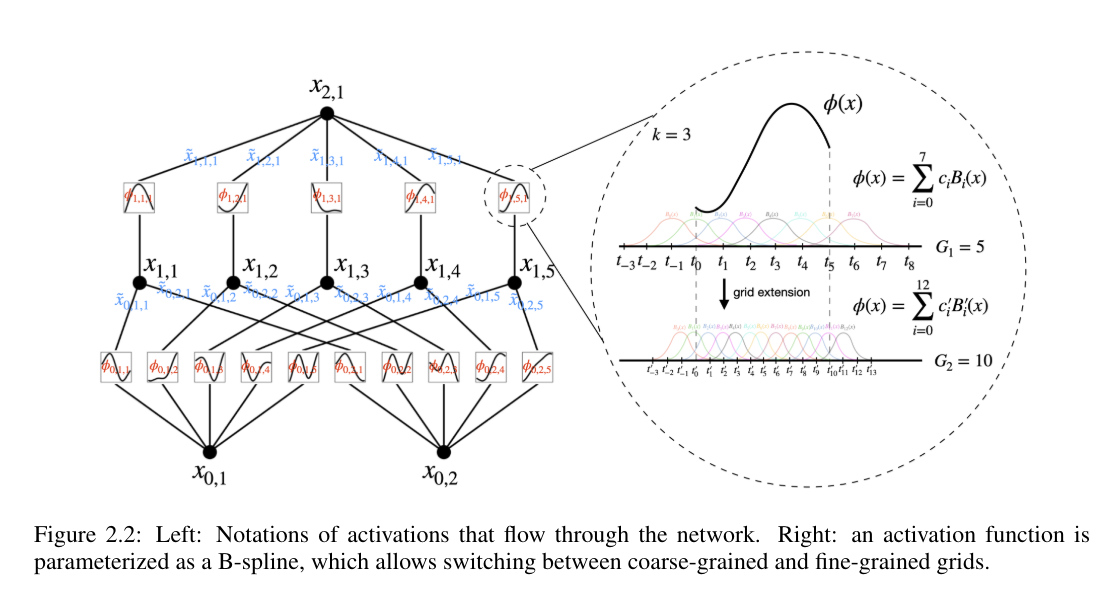


Il problema è che queste funzioni univariate (1D) possono essere non lisce o persino frattali, e quindi non essere facilmente apprendibili nella pratica. Tuttavia, nella maggior parte dei fenomeni reali, le funzioni sono lisce e facilmente apprendibili.

- Una funzione non liscia è una funzione che non è differenziabile in alcuni punti o lungo tutto il suo dominio. La differenziabilità di una funzione indica quanto "liscio" è il suo grafico; se una funzione è differenziabile, il suo grafico non ha angoli acuti o discontinuità. (Es: il valore assoluto di x, perché ha una piega non liscia in zero).

- Una funzione frattale è una funzione che mostra una struttura autosimilare, cioè parti del grafico della funzione assomigliano a versioni in miniatura dell'intero grafico. Le funzioni frattali sono spesso non lisce e possono avere una complessità infinita in termini di dettaglio e struttura. (Es: la Curva di Koch).


## 2.2 KAN architecture
un KAN layer è una matrice di fuzioni 1D con parametri addestrabili. con  nin la dimensione dell'input e nout la dimensione dell'output, si puo definire il kan layer come una metrice di funzionu 1D:
Φ = {ϕq,p}, p = 1, 2, · · · , nin, q = 1, 2 · · · , nout,

Dove le funzioni della matrice hanno parametri addestrabili

Per creare un architettura KAN si impilano uno sopra l'altro dei kan layer

La shape di una rete kan e rappresentata da un array di numeri interi 

[n0, n1, · · · , nL]

Dove ni e il numero di nodi nell i-esimo layer, si denota l i-esimo neurone  dell l-esimo layer come (l, i) e il valore di attivazione di quel neurone con xl,i

Tra il layer l e il layer l+1 ci sono  nl * nl+1 funzioni di attivazione 

Una funzione di attivazione che connette il nodo (l, i) e il nodo (l + 1, j) si indica come:
ϕl,j,i, l = 0, · · · , L − 1, i = 1, · · · , nl, j = 1, · · · , nl+1

La preattivazione di ϕl,j,i e semplicemente xl,i; la post attivazione di ϕl,j,i si indica con
x˜l,j,i ≡ ϕl,j,i(xl,i). 

Il valore di attivazione del (l + 1, j)-esimo neurone e la somma di tutte le postattivazioni
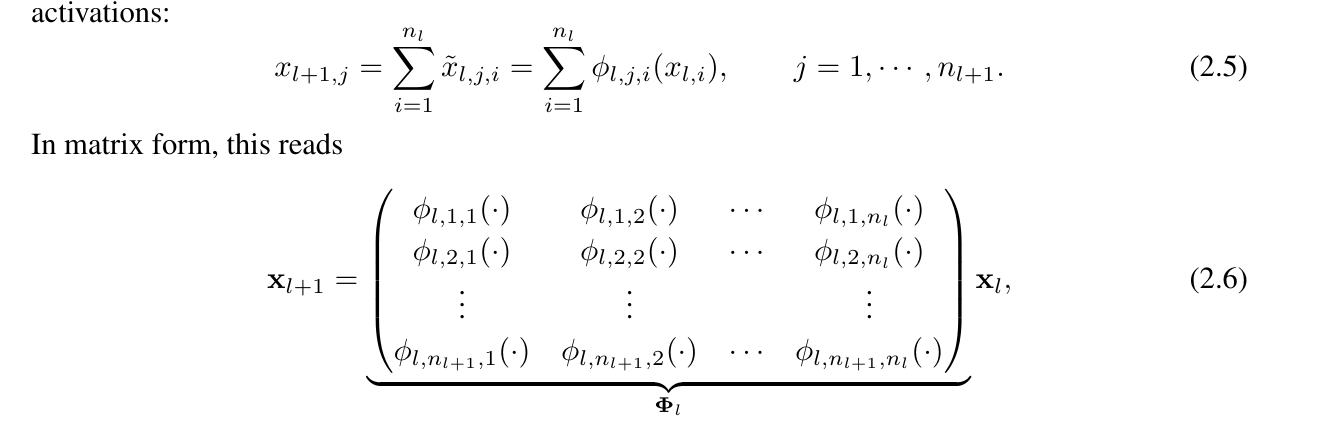

Φl è la matrice di funzioni corrispondente al livello l del KAN. Una rete KAN generale è una composizione di L livelli: dato un vettore di input x0 ∈ R^n0, l'output di KAN è KAN(x) = (ΦL−1 ◦ ΦL−2 ◦ · · · ◦ Φ1 ◦ Φ0)x.


è possibile allenare la kan usando la backpropagation


Gli MLP trattano le trasformazioni lineari e le non linearità separatamente come W e σ, mentre i KAN le trattano tutte insieme in Φ


Per ottimizzare un livello KAN si usano 3 punti chiave:
1) Funzioni di attivazione residuali. Includiamo una funzione di base b(x) (simile alle connessioni residuali) in modo tale che la funzione di attivazione φ(x) sia la somma della funzione di base b(x) e della funzione spline:
φ(x)=w(b(x)+spline(x)).
Impostiamo b(x)=silu(x)= x/(1 + e^−x)

Nella maggior parte dei casi spline(x) è parametrizzata come una combinazione lineare di B-spline in modo tale che
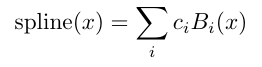
dove i ci sono addestrabili. In linea di principio w è ridondante poiché può essere assorbito in b(x) e spline(x). Tuttavia, includiamo comunque questo fattore w per controllare meglio la magnitudine complessiva della funzione di attivazione.

2) Scale di inizializzazione. Ogni funzione di attivazione è inizializzata in modo che spline(x)≈0. w è inizializzato secondo l'inizializzazione di Xavier, che è stata utilizzata per inizializzare i livelli lineari negli MLP.

3) Aggiorniamo ogni griglia in base alle sue attivazioni in input, per affrontare il problema che le spline sono definite su regioni limitate, ma i valori di attivazione possono evolversi al di fuori della regione fissata durante l'addestramento.


Il fatto che le KAN richiedano meno parametri le fa generalizzare meglio e le rende piu facili da interpretare.



## 2.3 KAN’s Approximation Abilities and Scaling Laws
Ci sono fenomeni che non possono essere rappresentati in modo liscio da reti di profondità l, ma che possono essere rappresentati in modo liscio da reti più profonde.

Le KAN con dimensione di griglia finita possono approssimare bene la funzione con un tasso di residuo indipendente dalla dimensione, superando così la maledizione della dimensionalità. Tuttavia, la dimensione influisce sulla costante c.

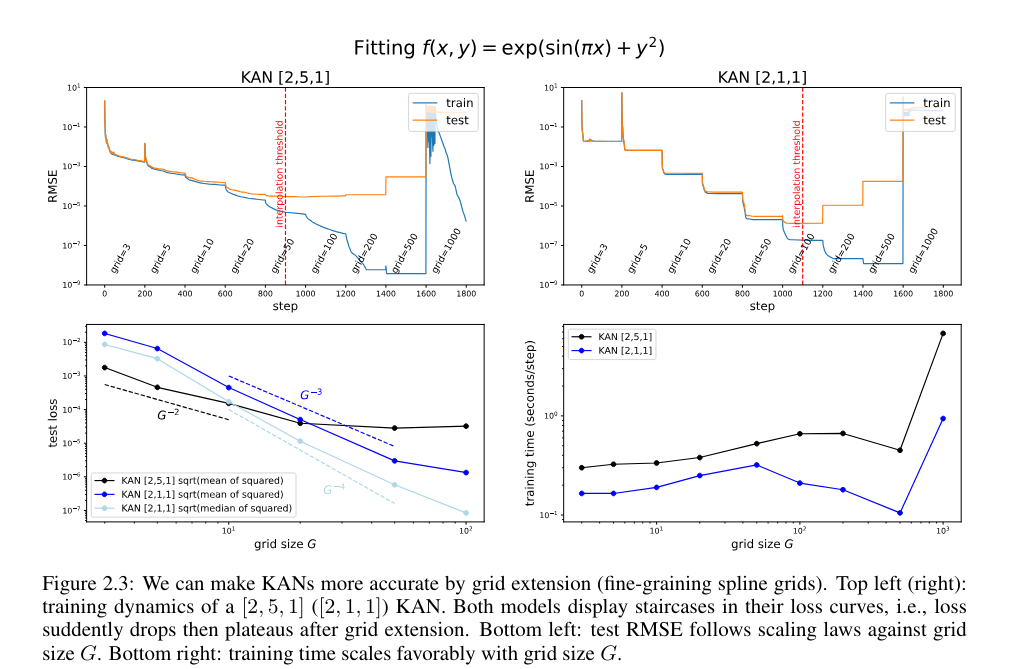

Il teorema di approssimazione universale (UAT) sostiene che una rete neurale a due strati con un numero sufficiente di neuroni può approssimare qualsiasi funzione entro una data tolleranza di errore ϵ. Tuttavia, non fornisce un limite su come il numero di neuroni necessari cresca con ϵ, e in alcuni casi questo numero può crescere in modo esponenziale con la dimensione del problema, fenomeno noto come maledizione della dimensionalità (COD). Al contrario, i KAN sfruttano una rappresentazione intrinsecamente a bassa dimensione della funzione, il che li rende più efficaci nel trattare funzioni simboliche rispetto agli MLP, che non sono ottimizzati per questa caratteristica.


## 2.4 For accuracy: Grid Extension
La Grid Extension è una tecnica di fine-tuning in cui inizialmente si addestra la KAN su pochi parametri, per poi migliorare la precisione diminuendo la grandezza della griglia delle splines (parametro di fine-graining). Successivamente, è possibile aumentare il numero di parametri della rete anche dopo che è stata allenata (continual learning).

L'estensione della griglia consiste nell'adattare una nuova spline più fine a una spline precedente più grossolana, utilizzando un algoritmo di minimizzazione dei minimi quadrati. Il parametro G indica la finezza della griglia.

Le KAN con architetture più piccole possono generalizzare meglio rispetto a quelle più grandi, dimostrando che la scelta dell'architettura gioca un ruolo cruciale nella performance del modello. Per scoprire l'architettura minima di una KAN, si utilizzano tecniche di regolarizzazione e potatura.

I gradi di libertà esterni, responsabili dell'apprendimento delle strutture composizionali delle variabili multiple, sono presenti anche negli MLP, ma non nelle spline. I gradi di libertà interni, presenti nelle spline ma non negli MLP, sono responsabili dell'apprendimento delle funzioni univariate. I gradi di libertà esterni sono determinati dalla connessione tra i nodi, mentre i gradi di libertà interni sono determinati dai punti della griglia.




## 2.5 For Interpretability: Simplifying KANs and Making them interactive

Non si sa come determinare a priori la migliore forma di una KAN per un determinato problema. Un possibile approccio è quello di iniziare con KAN molto grandi e poi ridurre la loro dimensione mediante potatura e l'uso di regolarizzazione della sparsità.

La regolarizzazione della sparsità nel contesto del deep learning è una tecnica utilizzata per incoraggiare i modelli a mantenere molti dei loro pesi o attivazioni vicino a zero. Questo aiuta a creare modelli più semplici e interpretabili, riducendo il rischio di overfitting e migliorando l'efficienza computazionale. Ecco alcuni punti chiave:

- L1 Regularization: Questa è una delle forme più comuni di regolarizzazione della sparsità. Aggiunge un termine alla funzione di perdita che penalizza la somma dei valori assoluti dei pesi. La funzione di perdita modificata diventa:

- Sparse Activation Regularization: Invece di penalizzare direttamente i pesi, questa tecnica penalizza le attivazioni dei neuroni. Ciò può essere utile per forzare il modello a utilizzare solo un sottoinsieme dei neuroni disponibili in ogni layer.

- Dropout: Sebbene non sia una forma di regolarizzazione della sparsità nel senso stretto, il dropout è una tecnica che aiuta a prevenire l'overfitting disattivando stocasticamente una porzione dei neuroni durante l'addestramento, il che può portare a una rappresentazione più sparsa.

##### 2.5.1 Simplification techniques

###### 1. Sparsification
le MLP possono usare la regolarizzazione L1 per favorire la sparsita, nelle kan pero ci sono 2 cose da considerare:
1) Assenza di Pesi Lineari: Nei KANs, i pesi lineari non esistono. Sono sostituiti da funzioni di attivazione apprendibili. Pertanto, la norma L1 deve essere applicata a queste funzioni di attivazione, non ai pesi.

2) Norma L1 Insufficiente: Si è riscontrato che la norma L1 da sola non è sufficiente per ottenere una buona sparsificazione nei KANs. È necessario aggiungere una regolarizzazione dell'entropia per ottenere risultati migliori.


Definiamo la norma L1 di una funzione di attivazione ϕ come la sua grandezza media sui suoi input Np

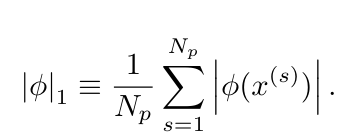


Quindi per uno strato KAN Φ con nin ingressi e nout ustite, definiamo la norma L1 di Φ come la somma delle norme L1 di tutte le funzioni di attivazione, ovvero,
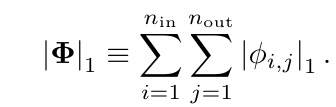


E definisamo l'entropia di Φ come:
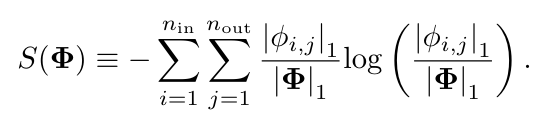


L'obiettivo di allenamento totale ℓtotal è la perdita di previsione ℓpred più L1 e la regolarizzazione entropica di tutti gli strati KAN:
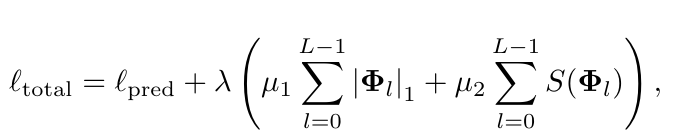

Dove µ1, µ2 sono grandezze relative solitamente impostate su µ1 = µ2 = 1 e λ controlla la grandezza complessiva della regolarizzazione

###### 2. Visualization.
Quando visualizziamo un KAN, per avere un'idea delle magnitudini, impostiamo la trasparenza di una funzione di attivazione ϕl,i,j proporzionale a tanh(βAl,i,j) dove β = 3. Quindi, le funzioni con piccole magnitudini appaiono sbiadite per permetterci di concentrarci su quelle importanti.

In pratica, è possibile visualizzare una KAN graficamente utilizzando il grafo delle funzioni, dove l'opacità di ogni funzione indica quanto essa contribuisce al risultato finale. Questo approccio fornisce una maggiore spiegabilità e trasparenza algoritmica.

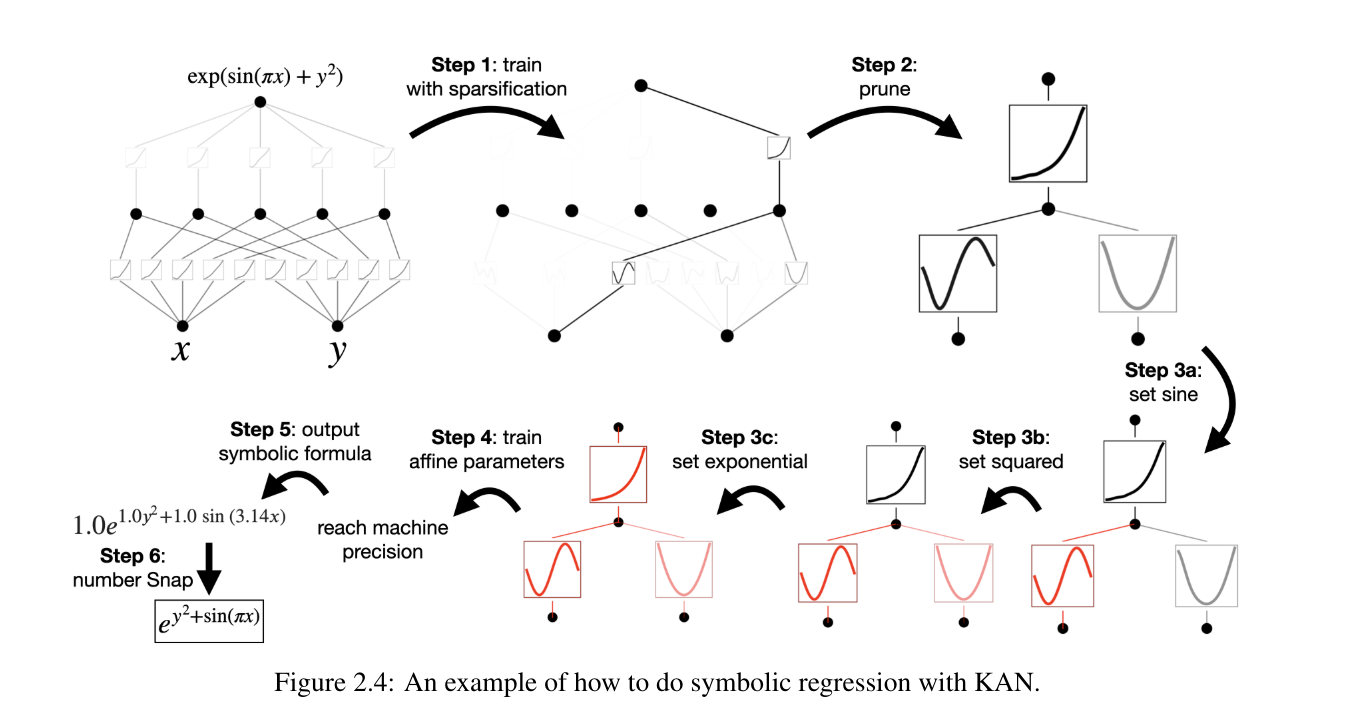


###### 3. Pruning
Dopo la sparsificazione si puo potare la rete per renderla piu piccola, si pota a livello di nodo piuttosto che di arco. Per ogni nodo (ad esempio il neurone i-esimo nel livello l), definiamo il suo punteggio di entrata e di uscita come
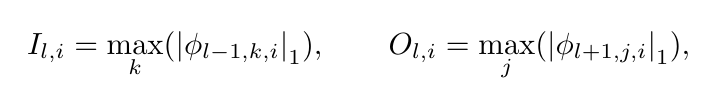


###### 4. Symbolification
Nei casi in cui sospettiamo che alcune funzioni di attivazione siano in realtà simboliche (ad esempio, cos o log), forniamo un'interfaccia per impostarle su una forma simbolica specificata. La funzione fix_symbolic(l,i,j,f) può impostare l'attivazione (l, i, j) su f. Tuttavia, non possiamo semplicemente impostare la funzione di attivazione sulla formula simbolica esatta, poiché i suoi input e output possono avere spostamenti e scale. Quindi, otteniamo pre-attivazioni x e post-attivazioni y dai campioni e adattiamo i parametri affini (a, b, c, d) in modo che y ≈ cf(ax + b) + d. L'adattamento viene eseguito tramite ricerca iterativa a griglia di a e b e regressione lineare.


##### 2.5.2 A toy example: how humans can interact with KANs
Quindi per semplificare uan kan si fanno questi passi:
1) si addestra una kan totalmente connessa abbastanza grande usando anche la regolarizzazione sparsa
2) si esegue il pruning sui neuroni meno importanti
3) si inseriscono eventuali funzioni simboliche in alcuni nodi. nel github di pykan le suggerisce la funzione suggest_symbolic
4) si continua ad addestrare la rete rimanente
5) infine si avra il modello finale

I metodi di regressione simbolica sono piu difficili da debuggare rispetto alle kan e molto meno interpretabili

# 3 KANs are accurate
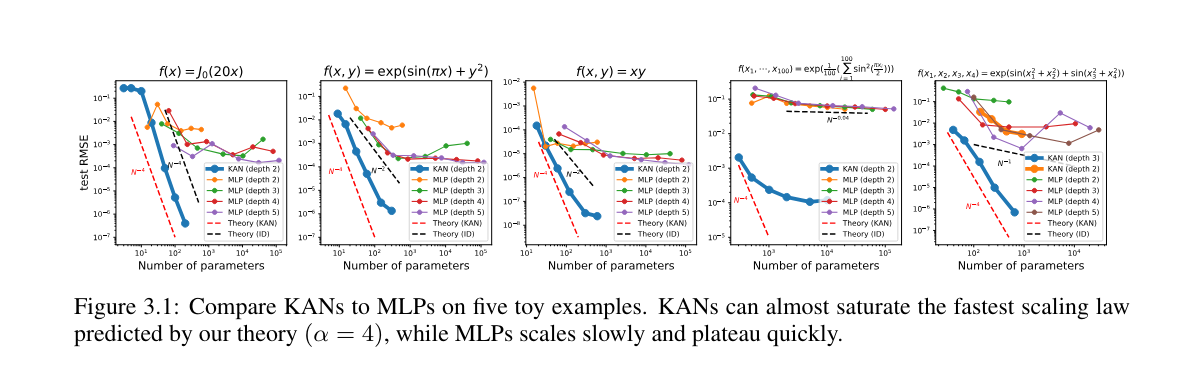

##### 3.1 Toy datasets
le kan scalano meglio delle mlp soprattutto con esempi ad alte dimensioni
kan piu profonde hanno un potere espressivo maggiore

##### 3.2 Special functions
uno dei problemi piu grossi è trovare la giusta forma delle kan che si adatta al nostroproblema

Trovare rappresentazioni KA (approssimate) compatte di funzioni speciali è possibile, rivelando nuove proprietà matematiche delle funzioni speciali dal punto di vista delle rappresentazioni di Kolmogorov-Arnold.

Le KAN sono più efficienti e precisi nella rappresentazione di funzioni speciali rispetto agli MLP.

##### 3.3 Feynman datasets
Nelle funzioni semplici le kan sono comparabili alle mlp, brillano in caso di funzioni complesse e oscillatorie

Le kan con le archittture auto scoperte rispetto a quelle con le architetture fatte dall'uomo, ma renderle cos piccole le rende piu difficili da interpretare perche le informazioni vengono compressate in uno spazio più ridotto

L'interpretabilità dei KAN, che può facilitare la scoperta scientifica.

##### 3.4 Solving partial differential equations
Le kan possono risolvere equazioni differenziali alle derivate parziali (PDE) in modo efficiente e con alta precisione
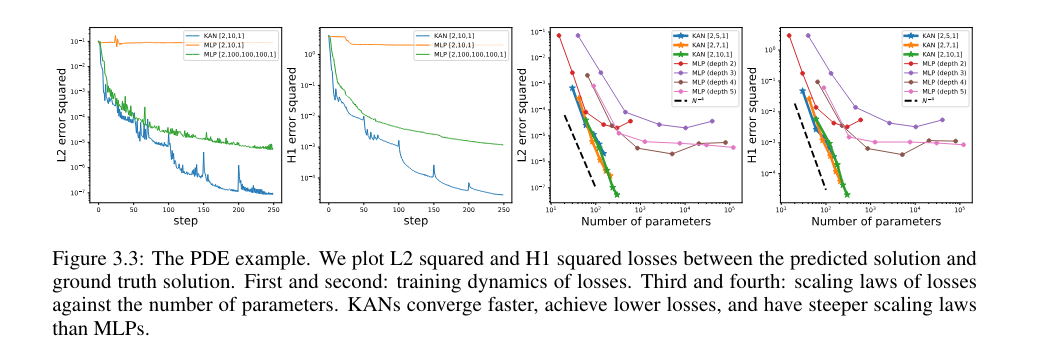


##### 3.5 Continual Learning
Le kan sono meno soggette al fenomeno del catastrophic forgetting grazie alle proprieta delle splines, il catastrophic forgetting è un fenomeno che accade quando addestri una rete che era gia stata allenata in precedenza su un altro dataset e una volta che viene allenata sul nuovo si "dimentica" del vecchio e si disallinea, ad esempio accade nelle reti convolutive nel task di classificare un certa categoria di immagini. le kan non ne sono affette perche cambiando il parametro di una splines ci sara solo un cambiamento locale e non globale, cosa che le mlp non possono fare perche hanno una matrice dei pesi monolitica
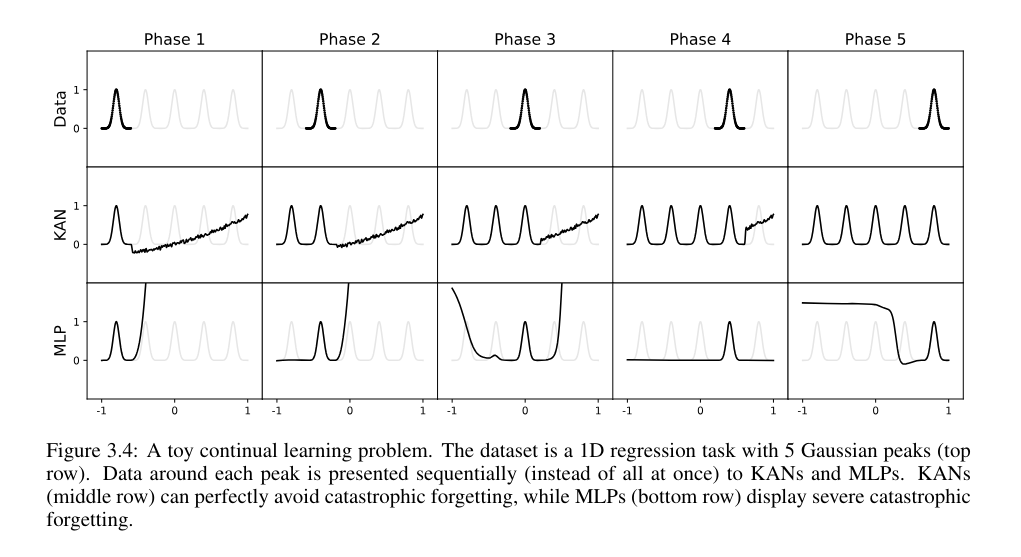


# 4 KANs are interpretable
Le KAN hanno un grandissimo potenziale nella ricerca scientifica grazie alla loro accuratezza e interpretabilità

4.1 Supervised toy datasets
Le KAN sono in grado di imparare funzioni speciali


4.2 Unsupervised toy dataset
Si possono usare le kan non solo in task d regressione, ma anche per trovare delle relazioni strutturali tra variabili, ad esempio una funzione che date n variabili restituisca 0   f(x1, x2, · · · , xd) ≈ 0
riuscendo cosi a trovare delle dipendenze tra le varaibili

4.3 Application to Mathematics: Knot Theory
(pippone gigante sulla teoria dei nodi, io non ho trvato nulla di nuovo che non avesse gia detto prima, se trovate qualcosa di interessante ditemelo)


4.4 Application to Physics: Anderson localization
Le KAN offrono un amaggior interazione uomo macchina rispetto alle mlp essendo piu interpretabili

Le KAN consentono agli utenti di regolare manualmente le formule simboliche per migliorare la comprensibilità senza compromettere significativamente l'accuratezza.


# 5 Related works

Le leggi di scala neurali (NSLs) descrivono come le prestazioni dei modelli neurali variano in relazione alla loro dimensione, ai dati utilizzati e alle risorse computazionali impiegate. Questo studio esplora come una funzione con molte variabili possa sorprendentemente comportarsi come una funzione più semplice, se ha una rappresentazione matematica particolare chiamata rappresentazione di Kolmogorov-Arnold. Questo risultato suggerisce che potremmo ottenere miglioramenti molto veloci nelle prestazioni dei modelli neurali. Se questa idea può essere applicata con successo a compiti più complessi, come la modellazione del linguaggio, è ancora oggetto di ricerca.


Mechanistic Interpretability (MI) è un campo emergente che si propone di comprendere meccanicamente il funzionamento interno delle reti neurali. La ricerca in MI può essere divisa approssimativamente in due categorie: passiva e attiva. La ricerca MI passiva si concentra sulla comprensione delle reti neurali esistenti addestrate con metodi standard. La ricerca MI attiva cerca di ottenere interpretabilità progettando architetture intrinsecamente interpretabili o sviluppando metodi di addestramento che incoraggiano esplicitamente l'interpretabilità. Il nostro lavoro rientra nella seconda categoria, dove il modello e il metodo di addestramento sono progettati per essere interpretabili sin dall'inizio.



Learnable activations. L'idea delle attivazioni apprendibili nelle reti neurali non è nuova nel campo dell'apprendimento automatico. Le funzioni di attivazione apprendibili sono apprese in modo differenziabile o cercate in modo discreto. Le funzioni di attivazione sono parametrizzate come polinomi, splines , unità lineare sigmoide, o reti neurali. Le KAN (Learnable Activation Networks) utilizzano B-splines per parametrizzare le loro funzaioni di attivazione.

# 6 Discussion

Il teorema su cui si basano le KAN fa riferimento a reti con shape [n, 2n + 1, 1] che rappresenta una sottoclasse molto restrittiva delle KAN. Un teorema generalizzato di Kolmogorov-Arnold potrebbe definire rappresentazioni "più profonde" oltre le composizioni di profondità 2, e potenzialmente collegare la regolarità delle funzioni di attivazione alla profondità. Ipoteticamente, esistono funzioni che non possono essere rappresentate regolarmente nelle rappresentazioni originali di Kolmogorov-Arnold di profondità 2, ma potrebbero essere rappresentate regolarmente con profondità 3 o superiore.



Accuracy: Esplorare completamente le scelte di progettazione dell'architettura e dell'addestramento può potenzialmente migliorare ulteriormente l'accuratezza delle KAN. Ad esempio, le funzioni di attivazione a spline potrebbero essere sostituite da funzioni a base radiale o altri kernel locali. Strategie di griglia adattive possono essere utilizzate per migliorare l'adattabilità.

Efficiency: Le KAN possono essere lente a causa della mancata condivisione della computazione batch tra diverse funzioni di attivazione. È possibile introdurre una soluzione intermedia tra le MLP (rete neurale multistrato) e le KAN raggruppando le funzioni di attivazione in più gruppi ("multi-head"), dove i membri all'interno di ciascun gruppo condividono la stessa funzione di attivazione, migliorando così l'efficienza computazionale.

Ibrido di KAN e MLP: Le KAN si differenziano dalle MLP principalmente per due motivi: (i) le funzioni di attivazione sono posizionate sugli archi anziché sui nodi, e (ii) le funzioni di attivazione sono apprendibili anziché fisse. Studi preliminari mostrano che il secondo punto, cioè la possibilità di apprendere le funzioni di attivazione, potrebbe essere più essenziale per spiegare il vantaggio delle KAN rispetto alle MLP.

Adattività: Grazie alla località intrinseca delle funzioni di base a spline, è possibile introdurre l'adattività nel design e nell'addestramento delle KAN per migliorare sia l'accuratezza che l'efficienza. Questo può essere realizzato tramite metodi di training multi-livello simili ai metodi multigriglia o l'uso di funzioni di base dipendenti dal dominio, come nei metodi multiscale.

le KAN sono più efficaci delle MLP in compiti legati alla scienza, come il fitting di equazioni fisiche e la risoluzione di equazioni differenziali alle derivate parziali (PDE). 


Final takeaway: Dovrei usare KAN o MLP?
Attualmente, il più grande ostacolo delle KAN risiede nella loro lenta fase di addestramento. Le KAN sono generalmente 10 volte più lente rispetto agli MLP, considerando lo stesso numero di parametri. Tuttavia, è importante essere onesti: non abbiamo fatto grandi sforzi per ottimizzare l'efficienza delle KAN, quindi consideriamo la lentezza nell'addestramento delle KAN più come un problema ingegneristico da migliorare in futuro piuttosto che come una limitazione fondamentale. Se si desidera addestrare un modello rapidamente, è consigliabile utilizzare gli MLP.

Tuttavia, in altri casi, le KAN dovrebbero essere comparabili o migliori degli MLP, il che le rende meritevoli di essere provate.
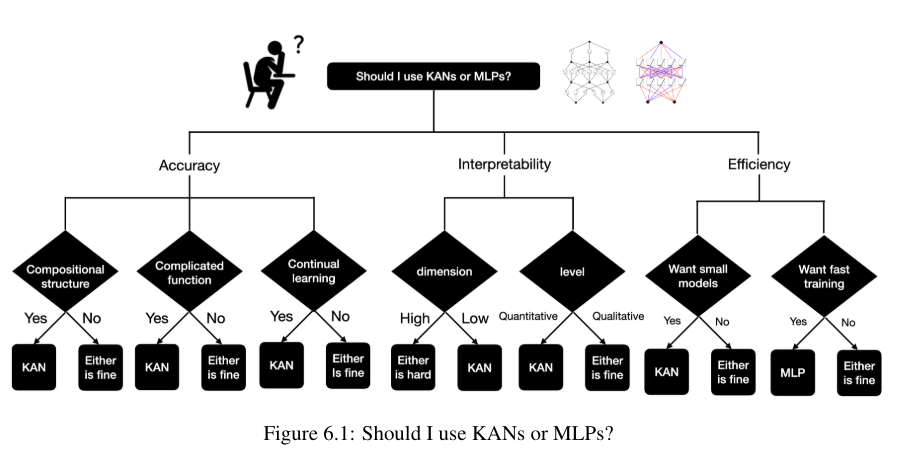


funzioni dei bro che forse ci toccah implementare:
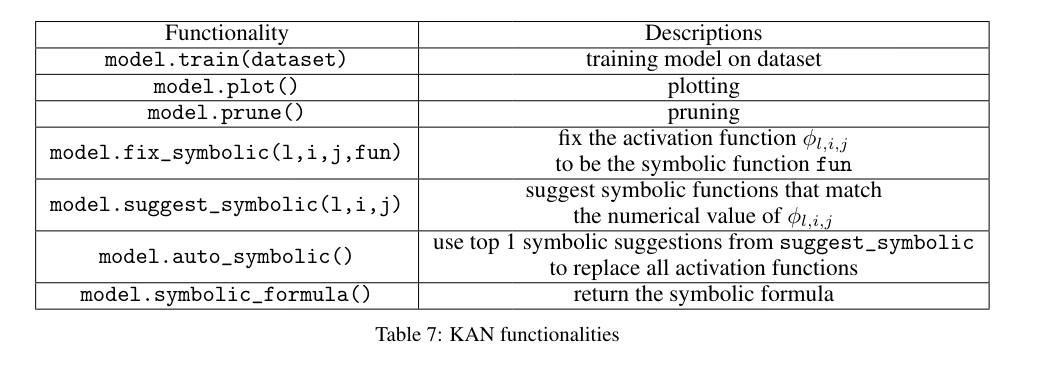

Le LAN sono delle KAN con le funzioni di attivazione messe sui nodi
Le LAN sono concettualmente più semplici rispetto ai KAN. Sono più vicine agli MLP standard (l'unico cambiamento è che le funzioni di attivazione diventano apprendibili).
Le LAN scalano meglio dei KAN. LAN/KAN hanno funzioni di attivazione apprendibili sui nodi/edge, rispettivamente. Quindi i parametri di attivazione nelle LAN/KAN scalano come N/N^2, dove N è la larghezza del modello.
Svantaggi delle LAN:

Le LAN sembrano essere meno interpretabili (le matrici dei pesi sono difficili da interpretare, come negli MLP).
Le LAN sembrano essere meno accurate dei KAN, ma comunque più accurate degli MLP. Come i KAN, le LAN ammettono l'estensione della griglia se le funzioni di attivazione delle LAN sono parametrizzate da splines.




Mostriamo gli effetti degli iperparametri nel caso di f(x, y) = exp(sin(πx) + y^2) nella Figura C.1. Per ottenere un grafico interpretabile, vogliamo che il numero di funzioni di attivazione attive sia il più piccolo possibile (idealemente 3).

Abbiamo bisogno di una penalità di entropia per ridurre il numero di funzioni di attivazione attive. Senza la penalità di entropia, ci sono molte funzioni duplicate.

I risultati possono dipendere dai semi casuali. Con alcuni semi sfortunati, la rete potata potrebbe essere più grande del necessario.

La forza complessiva della penalità λ controlla efficacemente la sparizione.

Il numero di griglia G ha anche un effetto sottile sull'interpretabilità. Quando G è troppo piccolo, poiché ciascuna funzione di attivazione non è molto espressiva, la rete tende a utilizzare la strategia di insieme, rendendo più difficile l'interpretazione.

L'ordine del polinomio a tratti k ha solo un effetto sottile sull'interpretabilità. Tuttavia, si comporta un po' come i semi casuali che non mostrano alcun modello visibile in questo esempio giocattolo.

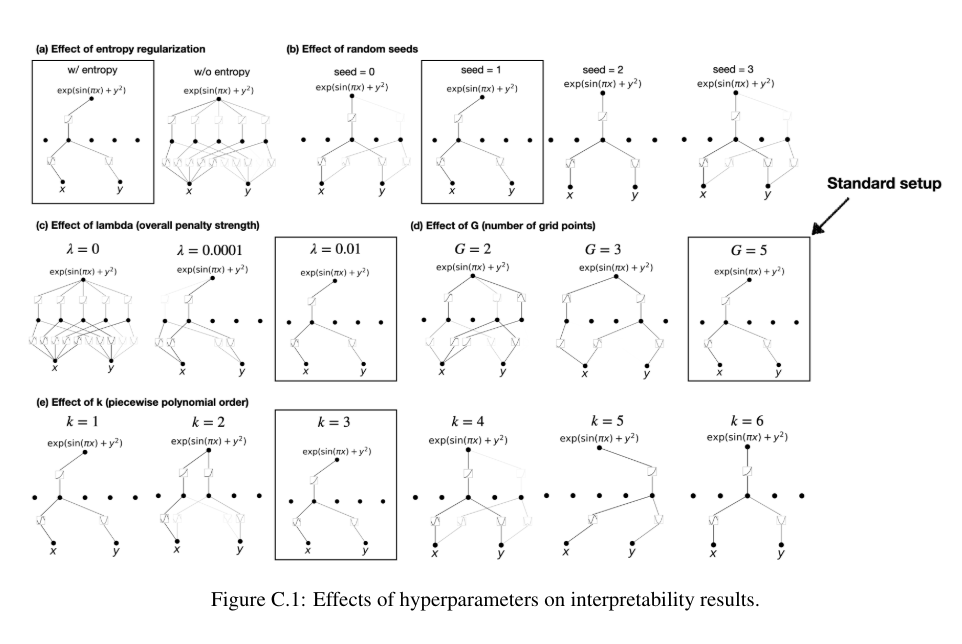

Per entrambi i compiti di equazioni differenziali alle derivate parziali e di regressione, quando scegliamo i dati di addestramento su griglie uniformi, osserviamo un improvviso aumento della perdita di addestramento (cioè un improvviso calo delle prestazioni) quando la dimensione della griglia viene aggiornata a un livello elevato, comparabile ai diversi punti di addestramento in una direzione spaziale. Questo potrebbe essere dovuto all'implementazione della B-spline in dimensioni superiori e necessita di ulteriori indagini.